In [14]:
from data_processing import EC_pH, dl_maker
from training import train_model, DataGenerator
from models import single_RNN, RNN_seq2seq
from testing import model_eval
from plot_model import train_loss_plot, predict_plot

# Not Seq2Seq

In [16]:
# data split and scaling
train_data, val_data, test_data, u, l = EC_pH(path = '데이터 경로입니다!!',
                                              type = 'EC or pH')
# data sliding
X, y  = dl_maker(one_or_multi = "one", train_data = train_data, val_data = val_data, test_data = test_data, window = 24, interval = 48)

In [17]:
# model 학습
model = single_RNN(model_type = 'lstm', unit = 32, window = 24)

history = train_model(model = model, save_path = '모델 저장 경로입니다!!', optim = "Adam",
             X = X, y = y, lr = 0.001, batch_size = 128, epochs = 5)
model_eval(model = model, last = False, X = X, y = y, u = u, l = l)

Epoch 1/5
105/106 [============================>.] - ETA: 0s - loss: 0.0134
Epoch 1: val_loss improved from inf to 0.01241, saving model to /content/test_model.keras
106/106 [==============================] - 9s 39ms/step - loss: 0.0133 - val_loss: 0.0124
Epoch 2/5
106/106 [==============================] - ETA: 0s - loss: 0.0050
Epoch 2: val_loss did not improve from 0.01241
106/106 [==============================] - 3s 33ms/step - loss: 0.0050 - val_loss: 0.0154
Epoch 3/5
106/106 [==============================] - ETA: 0s - loss: 0.0051
Epoch 3: val_loss did not improve from 0.01241
106/106 [==============================] - 4s 41ms/step - loss: 0.0051 - val_loss: 0.0124
Epoch 4/5
106/106 [==============================] - ETA: 0s - loss: 0.0052
Epoch 4: val_loss improved from 0.01241 to 0.01232, saving model to /content/test_model.keras
106/106 [==============================] - 3s 31ms/step - loss: 0.0052 - val_loss: 0.0123
Epoch 5/5
105/106 [============================>.] - ETA: 

,RMSE,MAE,MAPE(%),CC
Train,12.18,8.79,4.87,0.90
Validation,19.85,15.63,6.73,0.75
Test,20.64,15.56,8.53,0.75


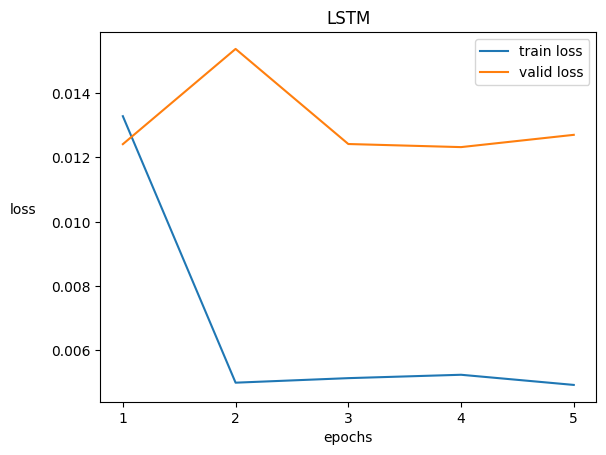

In [18]:
train_loss_plot(history = history, model_name = 'LSTM', epochs = 5, save_path = '그림 저장 경로입니다!!')

140/140 [==============================] - 1s 8ms/step


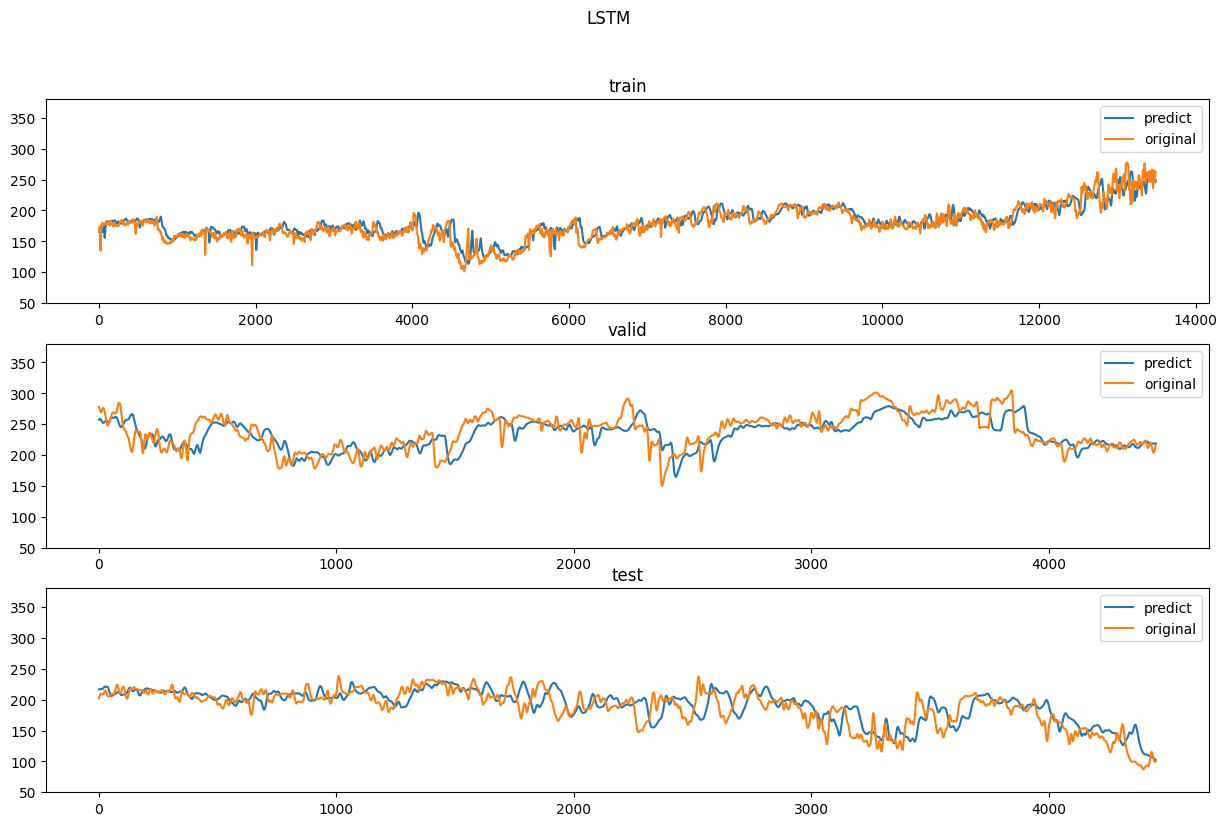

In [19]:
predict_plot(model = model, last = False, X = X, y = y, u = u, l = l, title = 'LSTM', save_path = '그림 저장 경로입니다.')

# seq2seq

In [20]:
X, y  = dl_maker(one_or_multi = "multi", train_data = train_data, val_data = val_data, test_data = test_data, window = 24, interval = 48)

In [21]:
model = RNN_seq2seq(model_type = 'lstm', unit = 32, window = 24, interval = 48)
history = train_model(model = model, save_path = '모델 저장 경로입니다!!', optim = "Adam",
             X = X, y = y, lr = 0.001, batch_size = 128, epochs = 5)
model_eval(model = model, last = True, X = X, y = y, u = u, l = l)

Epoch 1/5
106/106 [==============================] - ETA: 0s - loss: 0.0224
Epoch 1: val_loss improved from inf to 0.02675, saving model to /content/test_model.keras
106/106 [==============================] - 10s 55ms/step - loss: 0.0224 - val_loss: 0.0267
Epoch 2/5
106/106 [==============================] - ETA: 0s - loss: 0.0081
Epoch 2: val_loss improved from 0.02675 to 0.01917, saving model to /content/test_model.keras
106/106 [==============================] - 5s 46ms/step - loss: 0.0081 - val_loss: 0.0192
Epoch 3/5
106/106 [==============================] - ETA: 0s - loss: 0.0069
Epoch 3: val_loss did not improve from 0.01917
106/106 [==============================] - 6s 54ms/step - loss: 0.0069 - val_loss: 0.0258
Epoch 4/5
106/106 [==============================] - ETA: 0s - loss: 0.0062
Epoch 4: val_loss improved from 0.01917 to 0.01488, saving model to /content/test_model.keras
106/106 [==============================] - 5s 45ms/step - loss: 0.0062 - val_loss: 0.0149
Epoch 5/5


,RMSE,MAE,MAPE(%),CC
Train,11.78,8.58,4.86,0.90
Validation,20.09,15.89,6.92,0.75
Test,20.34,15.34,8.61,0.75


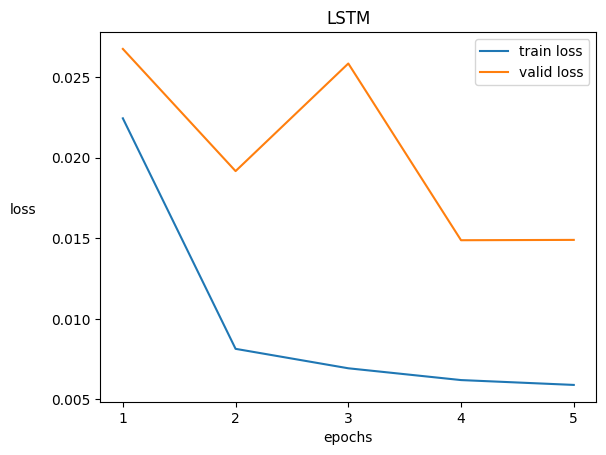

In [22]:
train_loss_plot(history = history, model_name = 'LSTM', epochs = 5, save_path = '그림 저장 경로입니다!!')

140/140 [==============================] - 1s 9ms/step


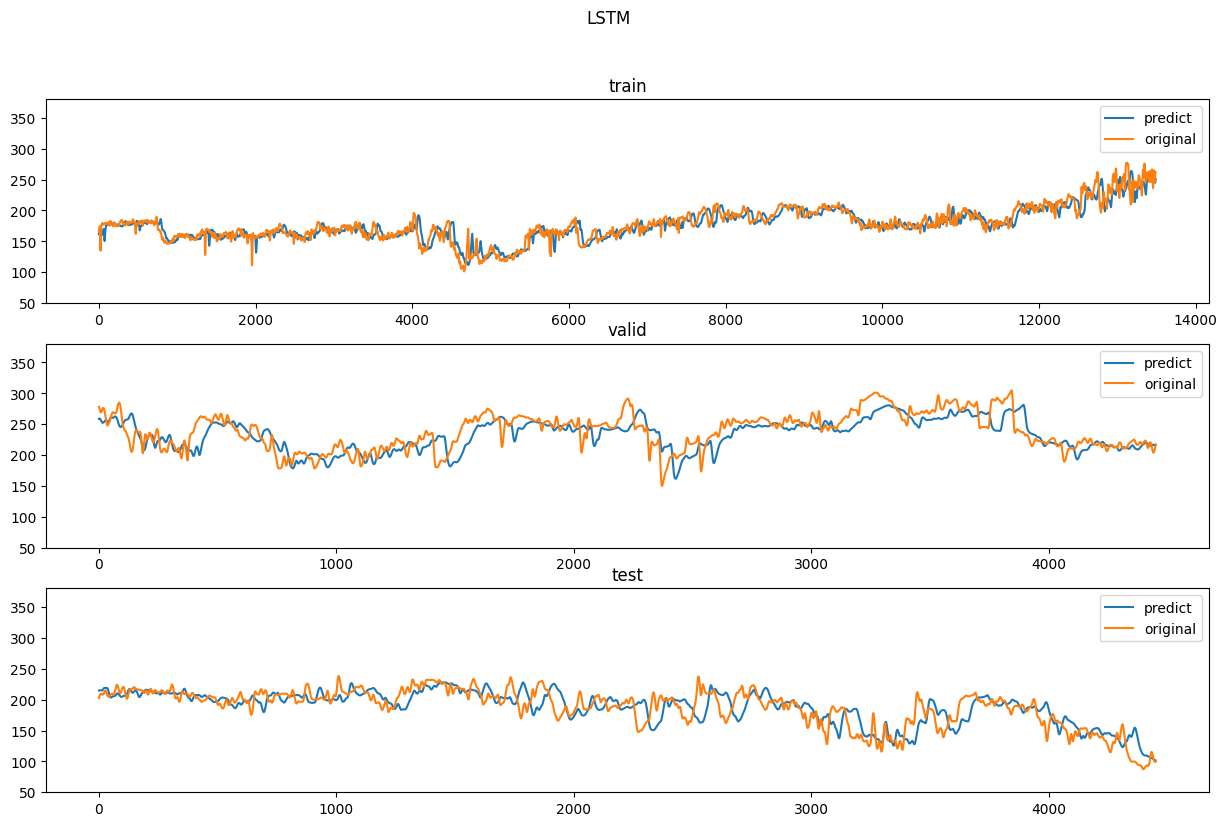

In [23]:
predict_plot(model = model, last = True, X = X, y = y, u = u, l = l, title = 'LSTM', save_path = '그림 저장 경로입니다,')